<a href="https://colab.research.google.com/github/IreneGallini/ML-algorithms-from-scratch/blob/main/logistic_regression/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal of linear regression 
Binary classification
Target variable and predictions are categories
Predict which class a set of inputs belongs to
1) Linear combination
2) Sigmoid/logistic function
3) Cost function: piecewise loss function
4) Gradient descent

Decision boundary spilts input space into two regions

In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv('nonlinear_data_circles.csv')
x_train=data[['x1','x2']].values #2D numpy array
y_train=data['label'].values #either 0 or 1

# Add polynomial features for circular separation
x1 = x_train[:, 0]
x2 = x_train[:, 1]
circle_feature = x1**2 + x2**2
x_poly = np.column_stack([x1, x2, circle_feature])

# Update m and n for new feature set
# m: number of training examples
# n: number of input features
m, n = x_poly.shape

Scatterplot

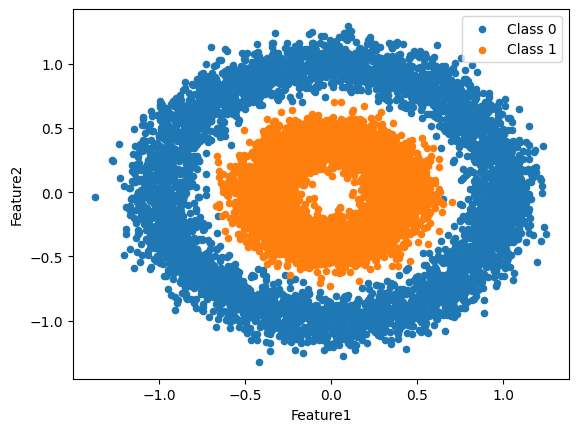

In [31]:
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='tab:blue', label='Class 0', s=20)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='tab:orange', label='Class 1', s=20)
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.show()

Implementation plan:
1) Sigmoid function
2) Cost function
3) Gradient function
4) Gradient descent function
5) Predict function

Step 1: Sigmoid function

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Step 2: Cost function

In [33]:
def cost_function(x,y,w,b):
    cost_sum=0
    for i in range (m):
        z = np.dot(w, x[i]) + b
        g = sigmoid(z)

        cost_sum += -y[i] * np.log(g) - (1-y[i]) * np.log(1-g)
    return (1/m)*cost_sum


Step 3: Gradient function

In [34]:
def gradient_function(x,y,w,b): 
    grad_w=np.zeros(n) #gradient of cost function is a vector
    grad_b=0

    for i in range(m):
        z=np.dot(w,x[i])+b #dot product
        g=sigmoid(z)

        grad_b+=(g-y[i])
        for j in range (n): 
            grad_w[j]+=(g-y[i])*x[i,j]
    grad_b=(1/m)*grad_b
    grad_w=(1/m)*grad_w
    return grad_b, grad_w

Step 4: Gradient descent function

In [35]:
def gradient_descent(x, y, learning_rate, num_iterations):
    w= np.zeros(n)  # Initialize weights: zero vector
    b=0  # Initialize bias
    for i in range(num_iterations):
        grad_b, grad_w = gradient_function(x, y, w, b)
        w -= learning_rate * grad_w
        b -= learning_rate * grad_b 
        if i % 100 == 0:  # Print cost every 100 iterations
            cost = cost_function(x, y, w, b)
            print(f"Iteration {i}, Cost: {cost}")
    return w, b

Use model to make predictions

In [36]:
def predict(x,w,b):
    preds=np.zeros(m)
    for i in range(m):
        z=np.dot(w,x[i])+b
        g=sigmoid(z)
        preds[i]=1 if g>=0.5 else 0
    return preds    

In [37]:
learning_rate = 0.01
num_iterations = 1000

final_w, final_b=gradient_descent(x_poly, y_train, learning_rate, num_iterations)

predictions = predict(x_poly, final_w, final_b)
accuracy = np.mean(predictions == y_train)*100
print(f"training accuracy: {accuracy:.2f}%")

Iteration 0, Cost: 0.692709161206783
Iteration 100, Cost: 0.6540208517709938
Iteration 200, Cost: 0.6223959028733644
Iteration 300, Cost: 0.595029247073101
Iteration 400, Cost: 0.5704993035848985
Iteration 500, Cost: 0.5480624885992813
Iteration 600, Cost: 0.5273056949344302
Iteration 700, Cost: 0.507978740314155
Iteration 800, Cost: 0.489913819364884
Iteration 900, Cost: 0.4729865792325002
training accuracy: 99.22%


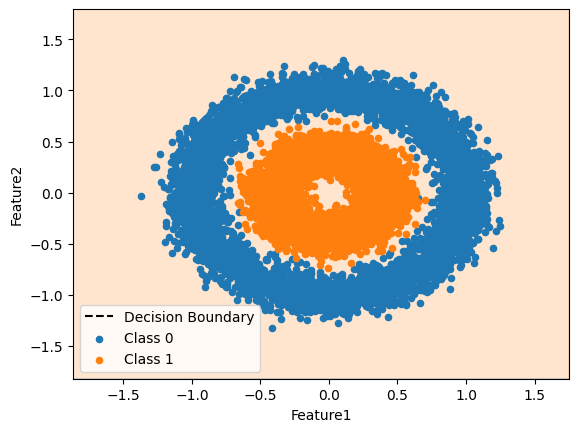

In [ ]:
#linear boundary 
m = -final_w[0] / final_w[1]
c = -final_b / final_w[1]

xmin, xmax = x_train[:, 0].min() - 0.5, x_train[:, 0].max() + 0.5
ymin, ymax = x_train[:, 1].min() - 0.5, x_train[:, 1].max() + 0.5
xd = np.array([xmin, xmax])
yd = m * xd + c

plt.plot(xd, yd, 'k', ls='--', label='Decision Boundary')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='tab:blue', label='Class 0', s=20)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='tab:orange', label='Class 1', s=20)
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()